In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.models import load_model
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.array(X_train, dtype = np.float32)
X_test = np.array(X_test, dtype = np.float32)
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 2s 0us/step


In [7]:
#Using ConvNets
convmodel = Sequential()
convmodel.add(Conv2D(filters=32, padding = "same", kernel_size = (5,5), activation = "relu", input_shape = (28,28,1)))
convmodel.add(BatchNormalization())
convmodel.add(Conv2D(filters=32, padding = "same", kernel_size = (5,5), activation = "relu"))
convmodel.add(BatchNormalization())
convmodel.add(MaxPooling2D(pool_size=(2,2)))
convmodel.add(Dropout(0.2))
convmodel.add(Conv2D(filters=64, padding = "same", kernel_size = (3,3), activation = "relu"))
convmodel.add(BatchNormalization())
convmodel.add(Conv2D(filters=64, padding = "same", kernel_size = (3,3), activation = "relu"))
convmodel.add(BatchNormalization())
convmodel.add(MaxPooling2D(pool_size=(2,2)))
convmodel.add(Dropout(0.4))
convmodel.add(Flatten())
convmodel.add(Dense(500, activation = "relu"))
convmodel.add(Dense(10, activation = "softmax"))
lr_reduc = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.9, min_lr=0.00001)
convmodel.compile(optimizer = "adadelta", loss = "categorical_crossentropy", metrics=["accuracy"])
convhist = convmodel.fit(X_train, y_train, batch_size=128, epochs=50, verbose = 1, validation_data=(X_test, y_test), callbacks=[lr_reduc])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 263us/step - loss: 0.4798 - acc: 0.9331 - val_loss: 0.0631 - val_acc: 0.9818
Epoch 2/50
60000/60000 [==============================] - 15s 246us/step - loss: 0.0517 - acc: 0.9843 - val_loss: 0.0562 - val_acc: 0.9831
Epoch 3/50
60000/60000 [==============================] - 15s 246us/step - loss: 0.0357 - acc: 0.9893 - val_loss: 0.0373 - val_acc: 0.9888
Epoch 4/50
60000/60000 [==============================] - 15s 246us/step - loss: 0.0273 - acc: 0.9919 - val_loss: 0.0234 - val_acc: 0.9932
Epoch 5/50
60000/60000 [==============================] - 15s 247us/step - loss: 0.0207 - acc: 0.9938 - val_loss: 0.0221 - val_acc: 0.9940
Epoch 6/50
60000/60000 [==============================] - 15s 246us/step - loss: 0.0184 - acc: 0.9945 - val_loss: 0.0164 - val_acc: 0.9950
Epoch 7/50
60000/60000 [==============================] - 15s 247us/step - loss: 0.0147 - acc: 0.9956 - val_loss: 0.

In [8]:
score = convmodel.evaluate(X_test, y_test,verbose=0)
score

[0.025153671517634302, 0.9957]

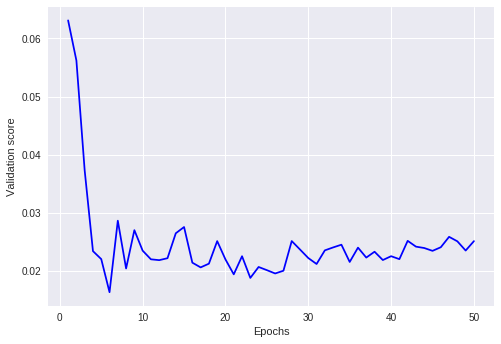

In [9]:
plt.plot(range(1, len(convhist.history["val_loss"])+1), convhist.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

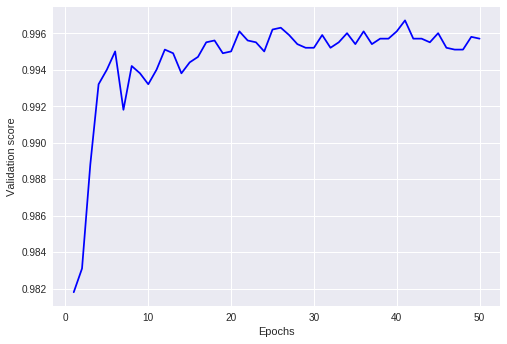

In [10]:
plt.plot(range(1, len(convhist.history["val_acc"])+1), convhist.history['val_acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [0]:
convmodel.save("ConvModel_v2.h5")

In [0]:
from google.colab import files
files.download("ConvModel_v2.h5")